# Scipy

![](https://www.fullstackpython.com/img/logos/scipy.png)

Scipy, pronounced as Sigh Pi, is a scientific python open source library to perform Mathematical, Scientific and Engineering computations. 

The SciPy library is built on NumPy library.

To install scipy use `pip install scipy` in your virtual environment.

## SciPy subpackages

![](https://miro.medium.com/max/10996/1*D5SkkJwO8oegwUE14SJH5w.png)

## SciPy Optimize package

- `minimize_scalar()` and `minimize()` to optimize a function of one variable and many variable respectively. 
- `curve_fit()` to fit a function to a set of data
- `root_scalar()` and `root()` to find the zeros of a function of one variable and many variables respectively.

### Minimize the function with one variable

In [1]:
from scipy.optimize import minimize_scalar

def function(x):
    return (3*x**4 - 2*x + 1)

In [2]:
function(2)

45

In [3]:
res = minimize_scalar(function)

In [4]:
res

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: 0.17451818777634331
       x: 0.5503212087491959
     nit: 12
    nfev: 15

**How to read the above output?**

1. The result metrics
- `x` : It is the value of the independent variable where the function reached its minimum.
- `fun` : This is the value of your objective function at the point $x$. This is the minimum value of the function you are optimizing.

2. Execution Metadata
- `success`: True A boolean indicating whether the optimizer actually finished its job correctly. True means it found a minimum that satisfied the mathematical requirements.

- `message`: "Optimization terminated successfully..." A human-readable description of the status. It confirms that the algorithm stopped because it reached the desired precision ($xtol$), not because it ran out of time or encountered an error.

- `nit`: The number of iterations. An iteration is a high-level step where the algorithm updates its "guess" for the minimum.

- `nfev`: The number of function evaluations. This tells you how many times the algorithm had to calculate $f(x)$. Usually, `nfev` is higher than `nit` because the algorithm might test several points within a single iteration to decide where to move next.

In [5]:
res.x

np.float64(0.5503212087491959)

In [6]:
res.fun

np.float64(0.17451818777634331)

In [7]:
def another_func(x):

    return 4*x**2 - 3*x + 2

In [8]:
res = minimize_scalar(another_func)

print(res.fun, res.x)

1.4375 0.37499999444000004


In [9]:
def f(x):

    return (-3*(x-3)**2 + 5)

In [10]:
minimize_scalar(f)

c:\Users\Sourav Karmakar\Desktop\Work\LogicMojo\logicmojo-data-science-ai-nov-2025\.venv\Lib\site-packages\scipy\optimize\_optimize.py:3049: RuntimeWarning: overflow encountered in scalar multiply
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom
c:\Users\Sourav Karmakar\Desktop\Work\LogicMojo\logicmojo-data-science-ai-nov-2025\.venv\Lib\site-packages\scipy\optimize\_optimize.py:3042: RuntimeWarning: overflow encountered in scalar multiply
  tmp1 = (xb - xa) * (fb - fc)
c:\Users\Sourav Karmakar\Desktop\Work\LogicMojo\logicmojo-data-science-ai-nov-2025\.venv\Lib\site-packages\scipy\optimize\_optimize.py:3043: RuntimeWarning: overflow encountered in scalar multiply
  tmp2 = (xb - xc) * (fb - fa)
c:\Users\Sourav Karmakar\Desktop\Work\LogicMojo\logicmojo-data-science-ai-nov-2025\.venv\Lib\site-packages\scipy\optimize\_optimize.py:3044: RuntimeWarning: invalid value encountered in scalar subtract
  val = tmp2 - tmp1
C:\Users\Sourav Karmakar\AppData\Local\Temp\ipykernel_2920\257681350

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: -inf
       x: -1.7095457019956215e+154
     nit: 35
    nfev: 773

### Maxmizing a function by minimizing its negative

In [11]:
def g(x):
    return (-1)*f(x)

In [12]:
f(2)

2

In [13]:
g(2)

-2

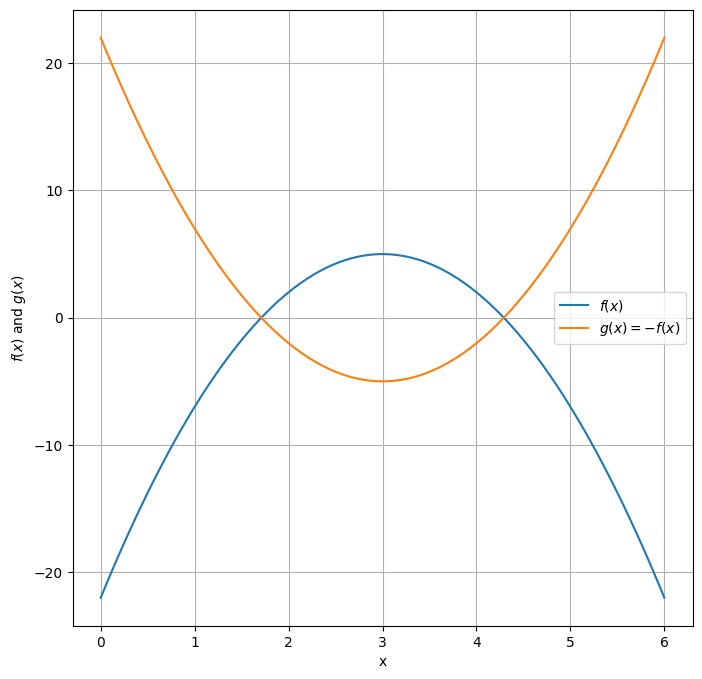

In [15]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,6,100)
y1 = f(x)
y2 = g(x)

plt.figure(figsize=(8,8))
plt.plot(x, y1, label = "$f(x)$")
plt.plot(x, y2, label = "$g(x) = -f(x)$")
plt.grid()
plt.legend()
plt.xlabel("x")
plt.ylabel("$f(x)$ and $g(x)$")
plt.show()

In [16]:
res = minimize_scalar(g)

In [17]:
res.x  # this is the value of x where the function attained its optima

np.float64(3.0000000000000004)

In [ ]:
f(res.x)   # this is the max value of the function f(x)

np.float64(5.0)

In [20]:
# Same using decorator

def negative(func):

    def wrapper(*args):
        result = func(*args)
        return -result
    
    return wrapper

In [21]:
f(3)

5

In [22]:
negative(f)(3)

-5

In [23]:
@negative

def g(x):
    return f(x)

In [24]:
g(5)

7

In [25]:
f(5)

-7

In [26]:
minimize_scalar(g)

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: -5.0
       x: 3.0000000000000004
     nit: 4
    nfev: 9

In [27]:
# Write your own maximize_scalar() function

In [28]:
def maximize_scalar(func):
    obj_func = negative(func)
    res = minimize_scalar(obj_func)
    result = {"x": res.x, "fun": func(res.x)}
    return result

In [29]:
maximize_scalar(f)

{'x': np.float64(3.0000000000000004), 'fun': np.float64(5.0)}

----------

## Numerical differentiation using scipy

In [31]:
from scipy.differentiate import derivative
import numpy as np

In [32]:
def sigmoid(x, alpha=1, beta=0):
    return (1/(1 + np.exp((-1)*(alpha*x+beta))))

In [34]:
x = np.linspace(-10,10,1000)
y = sigmoid(x)

In [35]:
x

array([-10.        ,  -9.97997998,  -9.95995996,  -9.93993994,
        -9.91991992,  -9.8998999 ,  -9.87987988,  -9.85985986,
        -9.83983984,  -9.81981982,  -9.7997998 ,  -9.77977978,
        -9.75975976,  -9.73973974,  -9.71971972,  -9.6996997 ,
        -9.67967968,  -9.65965966,  -9.63963964,  -9.61961962,
        -9.5995996 ,  -9.57957958,  -9.55955956,  -9.53953954,
        -9.51951952,  -9.4994995 ,  -9.47947948,  -9.45945946,
        -9.43943944,  -9.41941942,  -9.3993994 ,  -9.37937938,
        -9.35935936,  -9.33933934,  -9.31931932,  -9.2992993 ,
        -9.27927928,  -9.25925926,  -9.23923924,  -9.21921922,
        -9.1991992 ,  -9.17917918,  -9.15915916,  -9.13913914,
        -9.11911912,  -9.0990991 ,  -9.07907908,  -9.05905906,
        -9.03903904,  -9.01901902,  -8.998999  ,  -8.97897898,
        -8.95895896,  -8.93893894,  -8.91891892,  -8.8988989 ,
        -8.87887888,  -8.85885886,  -8.83883884,  -8.81881882,
        -8.7987988 ,  -8.77877878,  -8.75875876,  -8.73

In [36]:
y

array([4.53978687e-05, 4.63158512e-05, 4.72523952e-05, 4.82078759e-05,
       4.91826763e-05, 5.01771869e-05, 5.11918062e-05, 5.22269408e-05,
       5.32830055e-05, 5.43604233e-05, 5.54596260e-05, 5.65810541e-05,
       5.77251568e-05, 5.88923926e-05, 6.00832291e-05, 6.12981436e-05,
       6.25376227e-05, 6.38021631e-05, 6.50922714e-05, 6.64084646e-05,
       6.77512700e-05, 6.91212255e-05, 7.05188801e-05, 7.19447937e-05,
       7.33995376e-05, 7.48836947e-05, 7.63978594e-05, 7.79426385e-05,
       7.95186509e-05, 8.11265279e-05, 8.27669137e-05, 8.44404654e-05,
       8.61478535e-05, 8.78897620e-05, 8.96668888e-05, 9.14799456e-05,
       9.33296589e-05, 9.52167696e-05, 9.71420337e-05, 9.91062223e-05,
       1.01110122e-04, 1.03154537e-04, 1.05240284e-04, 1.07368200e-04,
       1.09539136e-04, 1.11753963e-04, 1.14013568e-04, 1.16318855e-04,
       1.18670749e-04, 1.21070190e-04, 1.23518141e-04, 1.26015581e-04,
       1.28563510e-04, 1.31162951e-04, 1.33814942e-04, 1.36520547e-04,
      

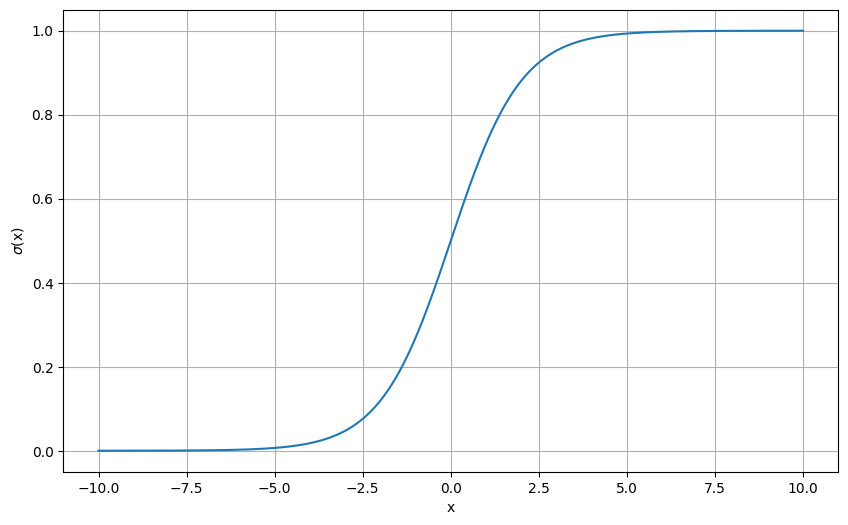

In [37]:
plt.figure(figsize=(10,6))
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("$\\sigma$(x)")
plt.grid()
plt.show()

In [38]:
diff_sigmoid = derivative(sigmoid, x)

In [39]:
diff_sigmoid

     success: [ True  True ...  True  True]
      status: [0 0 ... 0 0]
          df: [ 4.540e-05  4.631e-05 ...  4.631e-05  4.540e-05]
       error: [ 1.165e-16  1.188e-16 ...  8.175e-16  2.304e-16]
         nit: [2 2 ... 2 2]
        nfev: [11 11 ... 11 11]
           x: [-1.000e+01 -9.980e+00 ...  9.980e+00  1.000e+01]

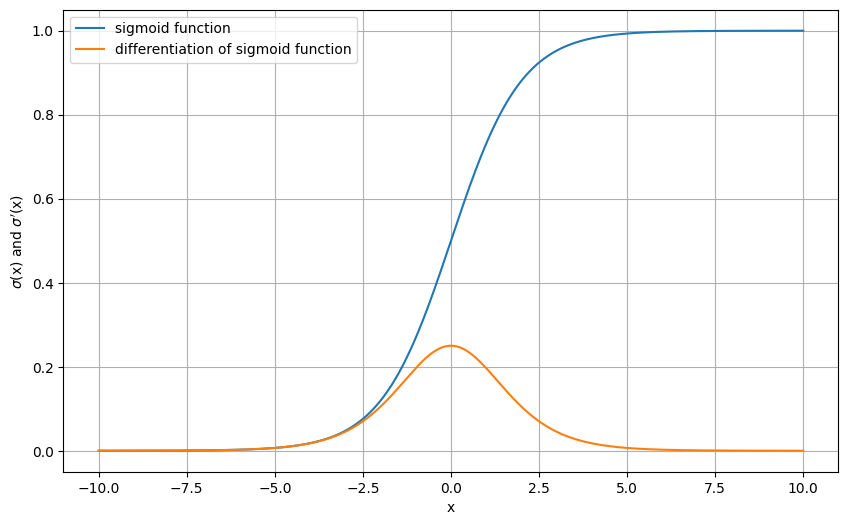

In [40]:
plt.figure(figsize=(10,6))
plt.plot(x,y,label="sigmoid function")
plt.plot(x,diff_sigmoid.df,label="differentiation of sigmoid function")
plt.xlabel("x")
plt.ylabel("$\\sigma$(x) and $\\sigma'$(x)")
plt.grid()
plt.legend()
plt.show()

----

## Integration using SciPy

In [41]:
def f(x):
    return x**2

In [42]:
from scipy.integrate import quad

# quad is for single variable general purpose integration.
# Integrate func from a to b (possibly infinite interval) using a technique from the Fortran library QUADPACK.

In [43]:
result, error = quad(f, 2, 5)  # this integrates the function (f) from 2 to 5

print(f"result = {result}, error = {error}")

result = 39.00000000000001, error = 4.3298697960381115e-13


In [44]:
def g(x):
    return np.exp(-x)

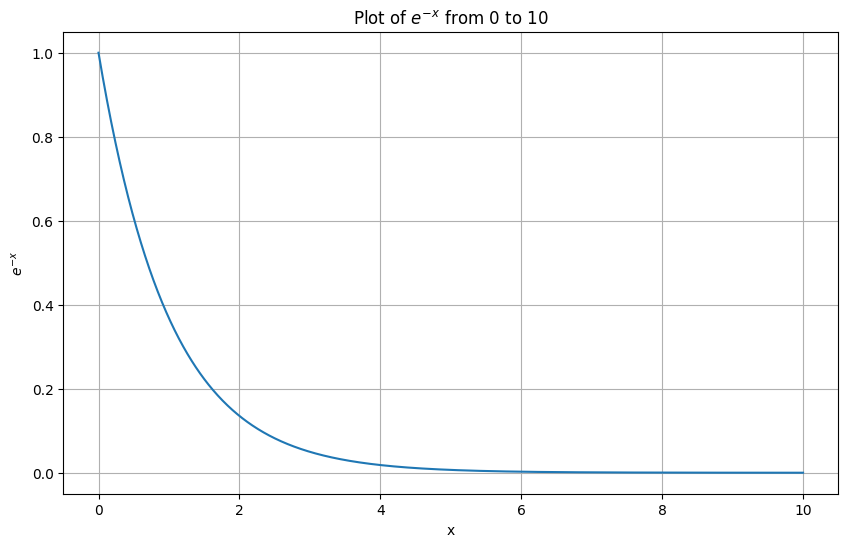

In [45]:
# plot g(x) = exp(-x) from 0 to 10

x = np.linspace(0,10,1000)
y = g(x)
plt.figure(figsize=(10,6))
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("$e^{-x}$")
plt.title("Plot of $e^{-x}$ from 0 to 10")
plt.grid()
plt.show()

In [46]:
result, error = quad(g, 0, np.inf)

print(f"result = {result}, error = {error}")

result = 1.0000000000000002, error = 5.842606703608969e-11


In [47]:
def std_normal_pdf(x):
    return (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * x**2)

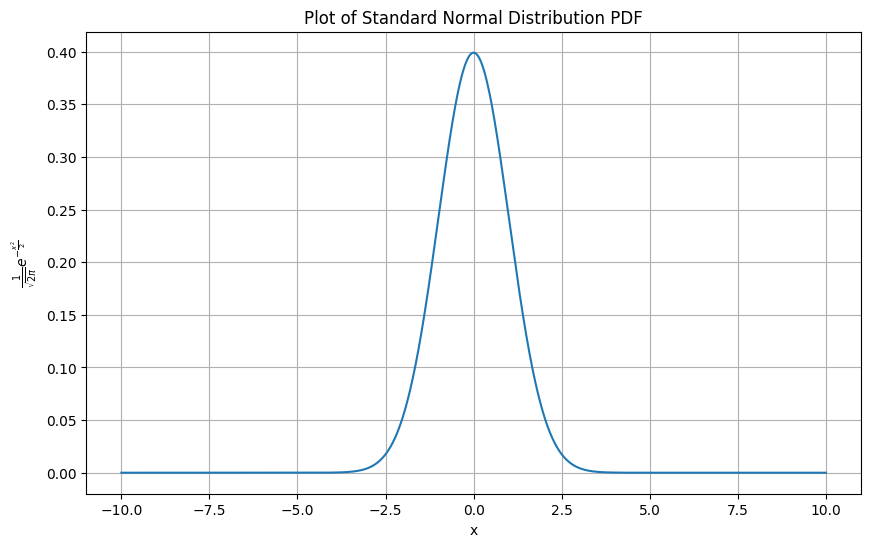

In [48]:
# Standard normal distribution PDF

x = np.linspace(-10,10,2000)
y = std_normal_pdf(x)
plt.figure(figsize=(10,6))
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("$\\frac{1}{\\sqrt{2\\pi}} e^{-\\frac{x^2}{2}}$")
plt.title("Plot of Standard Normal Distribution PDF")
plt.grid()
plt.show()

In [49]:
result, error = quad(std_normal_pdf, -np.inf, np.inf)

print(f"result = {result}, error = {error}")

result = 0.9999999999999997, error = 1.0178191437091558e-08


--------

## Multivariable Optimization using SciPy

In [50]:
def mul_func(args):
    x,y,z = args
    return 3*(x-2)**2 + 4*(y-3)**2 + 5*(z-1)**2 + 12

In [51]:
from scipy.optimize import minimize

In [52]:
initial_guess = [1, 1, 1]
res = minimize(mul_func, initial_guess)

In [53]:
res

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 12.000000000000002
        x: [ 2.000e+00  3.000e+00  1.000e+00]
      nit: 9
      jac: [ 0.000e+00  1.192e-07  0.000e+00]
 hess_inv: [[ 1.680e-01 -5.191e-04 -1.896e-05]
            [-5.191e-04  1.252e-01  5.049e-06]
            [-1.896e-05  5.049e-06  1.000e-01]]
     nfev: 44
     njev: 11

**How to interpret the above result?**

1. The Core Result

- `x`: Since this is a multi-variable problem, $x$ is now an array. This represents the coordinates in your multi-dimensional space (e.g., $x_1=2, x_2=3, x_3=1$) where the function is at its lowest.

- `fun`: The value of your objective function at the point.

2. Calculus-Based Metrics: These fields tell you about the local geometry of the function at the stopping point.

-  `jac`: The Jacobian is the vector of partial derivatives (the gradient). At a true minimum, the gradient should be zero.

- `hess_inv`: This is the Inverse `Hessian Matrix`. The Hessian represents the second-order derivatives (curvature).

    - It tells the algorithm how "steeply" the function curves in different directions.

3. Execution & Efficiency

- `status`: A numerical code for the exit status. 0 always means "Successful termination." Other numbers would indicate specific errors (like reaching the iteration limit).

- `nit`: The algorithm took 9 main iterations to converge.

- `nfev`: Number of Function Evaluations.

- `njev`: Number of Jacobian (gradient) Evaluations.

Note: It’s normal for nfev to be much higher than njev, as the algorithm tests multiple points to determine the "step length" after it knows the direction from the Jacobian.